# Project 5


In [53]:
import json
import datetime
import pandas as pd
import numpy as np
import pytz
pst_tz = pytz.timezone('America/Los_Angeles')

In [2]:
def tweet_to_df(tweet_d):
    df = pd.DataFrame(tweet_d, columns=['ID', 'Title', 'nFollowers', 'nReTweet','Ranking Score','impressions','TimeStamp'])
    df.sort('TimeStamp',inplace = True)
    return df

In [46]:
#users_with_geodata = {
        #"data": []
#    }

users_with_geodata

all_users = []
total_tweets = 0
geo_tweets  = 0

In [68]:
def extract_tweets_into_df(file):
    users_with_geodata = [] 
    geo_tweets  = 0
    temp = []
    for line in open(file):
        
        t = json.loads(line)
        
        
        if t['tweet']['user']['id']:

            user_data = {
                "user_id" : t['tweet']['user']['id'],
                "title":t['title'],
                "date":datetime.datetime.fromtimestamp(t['citation_date'],pst_tz),
                "name" : t['tweet']['user']['name']
                #    "location": t['tweet']['user']['location'],
                }
                
            
            if t['tweet']['coordinates']:
                    user_data["lat"] = str(t['tweet']['coordinates'][list(t['tweet']['coordinates'].keys())[1]][1])
                    user_data["long"] = str(t['tweet']['coordinates'][list(t['tweet']['coordinates'].keys())[1]][0])
                    #user_data["features"]["geo_type"] = "Tweet coordinates"
            #elif t['tweet']['place']:
            #    user_data["features"]["primary_geo"] = t['tweet']['place']['full_name'] + ", " + t['tweet']['place']['country']
            #    user_data["features"]["geo_type"] = "Tweet place"
            #else:
            #    user_data["features"]["primary_geo"] = t['tweet']['user']['location']
            #    user_data["features"]["geo_type"] = "User location"
            #if user_data["features"]["primary_geo"]:
                    temp.append(user_data)
                    geo_tweets += 1
    print("Number of GEo Tweets %d"%geo_tweets)        
    return pd.DataFrame(temp)



In [108]:
nfl_df = extract_tweets_into_df("data/tweets_#nfl.txt")
#nfl_df.head()

Number of GEo Tweets 5253


In [109]:
sb_df = extract_tweets_into_df("data/tweets_#superbowl.txt")
#sb_df.head()

Number of GEo Tweets 58663


In [110]:
sb49_df = extract_tweets_into_df("data/tweets_#sb49.txt")
#sb49_df.head()


Number of GEo Tweets 37322


In [111]:
pat_df = extract_tweets_into_df("data/tweets_#patriots.txt")
#pat_df.head()

Number of GEo Tweets 19732


In [112]:
hawks_df = extract_tweets_into_df("data/tweets_#gohawks.txt")
#hawks_df.head()

Number of GEo Tweets 10774


In [113]:
go_pat_df = extract_tweets_into_df("data/tweets_#gopatriots.txt")
#print (go_pat_df)
go_pat_df.head()

Number of GEo Tweets 1599


,date,lat,long,name,title,user_id
0,2015-01-14 07:23:00-08:00,42.237286,-71.006108,Kathleen Williams,@honeychocolate9 You too!! Only 4 more days un...,459528569
1,2015-01-15 16:32:28-08:00,19.394573,-99.165546,Emilio o/,@PatriotsMexico nuevo avatar #SomosPats #GoPat...,474137249
2,2015-01-15 19:11:55-08:00,36.936004,-86.422495,Scott Falcone,@alexsizemore24 @Colts @Southrn_Melle I think ...,400470962
3,2015-01-15 19:29:36-08:00,41.999698,-70.704027,Leanne,"""Do Your Job"" #LoveThis #PatriotsNation #Duckl...",827193950
4,2015-01-16 05:35:48-08:00,42.106922,-71.022865,Kathleen Williams,@honeychocolate9 Morning Miss Logan!! #TGIF :...,459528569


In [114]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob
import json

import pytz
pst_tz = pytz.timezone('America/Los_Angeles')

In [59]:
piece_time = datetime.datetime(2015, 2, 1, 8, 0).timestamp()
piece_time_pst = datetime.datetime.fromtimestamp(piece_time, pst_tz)
piece_time_2 = datetime.datetime(2015, 2, 1, 20, 0).timestamp()
piece_time_2_pst = datetime.datetime.fromtimestamp(piece_time_2, pst_tz)


In [176]:
import numpy as np
from itertools import chain
def plot_map(long,lat):
    fig = plt.figure(figsize=(16, 12), edgecolor='w')

    m = Basemap(projection='lcc', resolution=None,
                width=8E6, height=8E6, 
                lat_0=45, lon_0=-100,)
    m.etopo(scale=0.5, alpha=0.5)
    x, y = m(long, lat)
    m.plot(x,y,'o')
    plt.show()

# Analyzing Seahawks Fans

In [178]:
frame = [hawks_df]
df = pd.concat(frame)
df[['polarity', 'subjectivity']] = df['title'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

df.head()

,date,lat,long,name,title,user_id,polarity,subjectivity
0,2015-01-16 20:06:19-08:00,55.342343,-131.643338,907Akpride,You been 12ed pass it on #SeahawkNation #LOB #...,339568235,0.000000,0.00
1,2015-01-14 15:08:52-08:00,47.789978,-122.353024,Jenifer Strobeck,I am too freaking excited for Saturday!!! #Sea...,384115132,0.732422,0.75
2,2015-01-16 14:38:32-08:00,47.36295,-122.127373,Patrice Keefer,I LOVE this and it will be my next @Seahawks S...,21597822,0.250000,0.30
3,2015-01-16 22:09:21-08:00,47.224734,-122.278377,Joel Beattie,@RealMikeRob NICE SOCKS .. \n\n#GOHAWKS #SEAvs...,133479487,0.600000,1.00
4,2015-01-17 12:44:46-08:00,47.495693,-122.633575,Kendal (ू•ᴗ•ू❁) ☁,Cheer comp today! #seahawks #GoHawks @Seahawks...,629130606,0.000000,0.00


In [ ]:
#neg_df = df[(df['date'] > piece_time_2_pst) & (df['polarity'] == -1 )]

### Analysize user location post superbowl

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


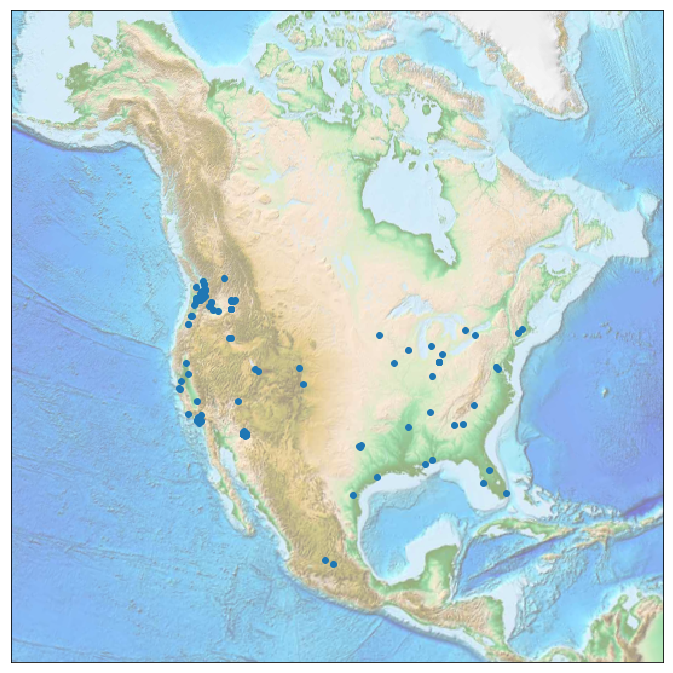

In [180]:
t_df = df[(df['date'] > piece_time_2_pst)]
lat = pd.to_numeric(t_df['lat']).values
long = pd.to_numeric(t_df['long']).values
plot_map(long,lat)


### Analyze negetive tweets for Seahaks fan post match


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


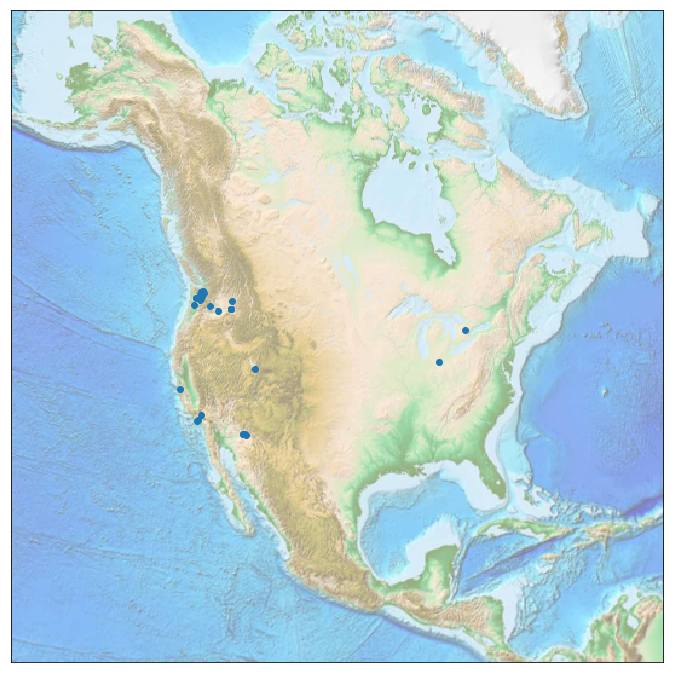

In [183]:
neg_df = df[(df['date'] > piece_time_2_pst) & (df['polarity'] < 0 )]

lat = pd.to_numeric(neg_df['lat']).values
long = pd.to_numeric(neg_df['long']).values
plot_map(long,lat)

### Analyze positive tweet for patriot fans

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


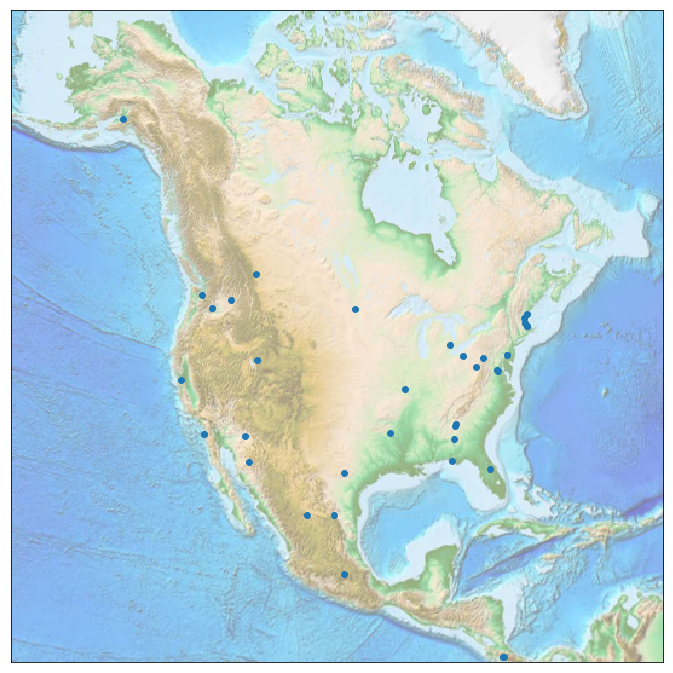

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


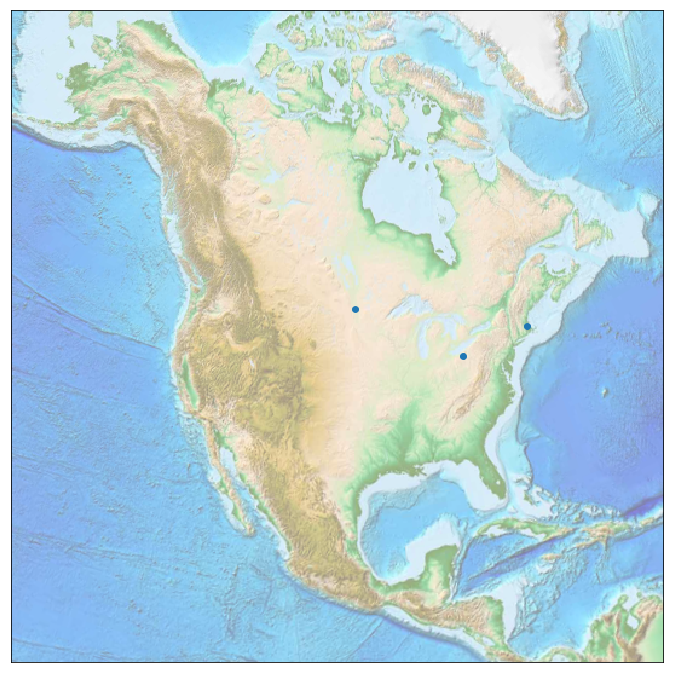

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


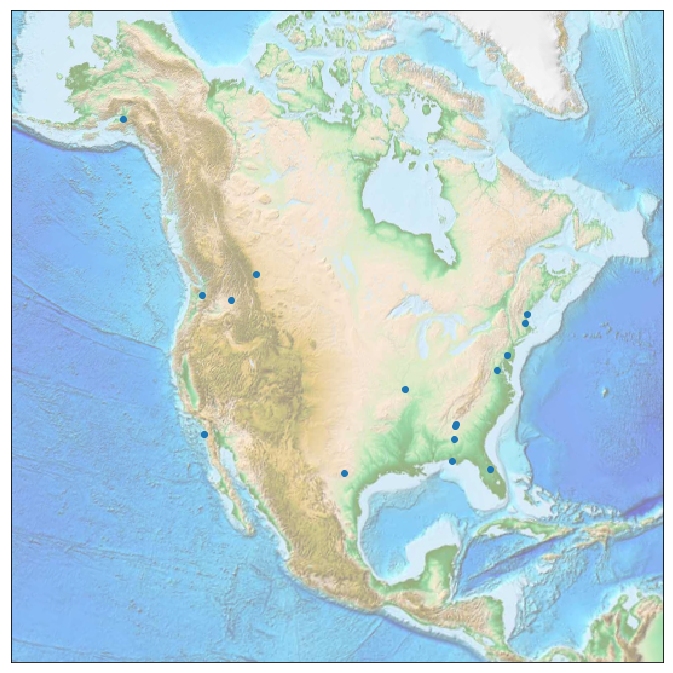

In [185]:

df = go_pat_df


df[['polarity', 'subjectivity']] = df['title'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

df.head()

t_df = df[(df['date'] > piece_time_2_pst)]
lat = pd.to_numeric(t_df['lat']).values
long = pd.to_numeric(t_df['long']).values
plot_map(long,lat)


neg_df = df[(df['date'] > piece_time_2_pst) & (df['polarity'] < 0 )]

lat = pd.to_numeric(neg_df['lat']).values
long = pd.to_numeric(neg_df['long']).values
plot_map(long,lat)

pos_df = df[(df['date'] > piece_time_2_pst) & (df['polarity'] > 0 )]

lat = pd.to_numeric(pos_df['lat']).values
long = pd.to_numeric(pos_df['long']).values
plot_map(long,lat)